** Step -1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step -2 : Load Dataset **

In [32]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [33]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

** Extracting data**

In [48]:
X = digits.data # independent variable
y = digits.target # dependent variable

In [49]:
X.shape , y.shape

((1797, 64), (1797,))

In [53]:
# Normalization [0 - 1] -> threshold 
X[X>7]  = X.max() # if greater than 7 replace that with max value
X[X<=7] = X.min() # if less than 7 replace that with min value

[0]


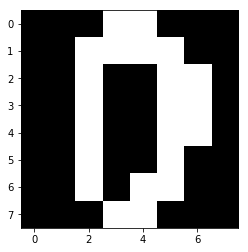

In [55]:
img1 = X[0:1]
print(y[0:1])
plt.imshow(img1.reshape((8,8)),cmap = 'gray')

** Step -3: Standard Scaling **

In [56]:
X = X / X.max()

In [58]:
X.shape, X.max()

((1797, 64), 1.0)

**Step - 5 : Splitting data into testing and training**

In [59]:
from sklearn.cross_validation import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,
                                                   random_state = 0)

In [61]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

**Step -6 : Bulding a Machine Learning Classifier**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C=10.0, kernel='rbf')
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)

In [64]:
model_log.fit(x_train, y_train) # Logistic regression
model_knn.fit(x_train, y_train) # KNearest Neighbour
model_svm.fit(x_train, y_train) # Support vector machine
model_dt.fit(x_train, y_train) # Desicion Tree
model_rf.fit(x_train, y_train) # Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step-7: Evaluation ** 

In [66]:
y_pred_log = model_log.predict(x_test) # for evalutating model
y_pred_knn = model_knn.predict(x_test) # for evalutating model
y_pred_svm = model_svm.predict(x_test) # for evalutating model
y_pred_dt = model_dt.predict(x_test) # for evalutating model
y_pred_rf = model_rf.predict(x_test) # for evalutating model


**Classification Report**

In [68]:
from sklearn.metrics import confusion_matrix , classification_report

In [69]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix 
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix 
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix 
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix 
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix 

# Classification report
cr_log = classification_report(y_test, y_pred_log)
cr_knn = classification_report(y_test, y_pred_knn)
cr_svm = classification_report(y_test, y_pred_svm)
cr_dt = classification_report(y_test, y_pred_dt)
cr_rf = classification_report(y_test, y_pred_rf)

In [70]:
import seaborn as sns

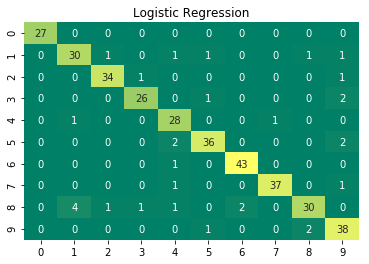

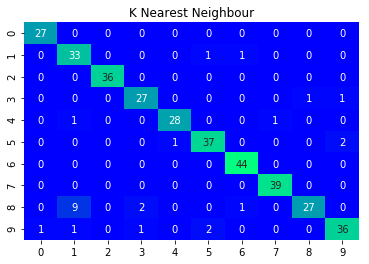

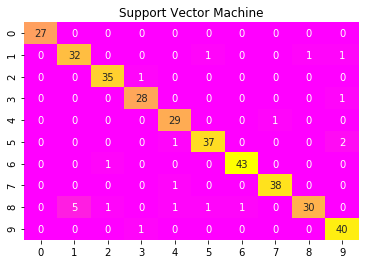

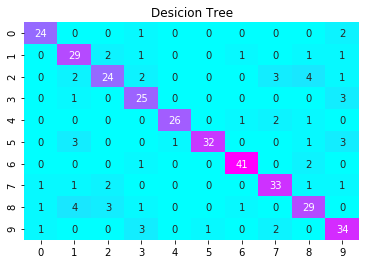

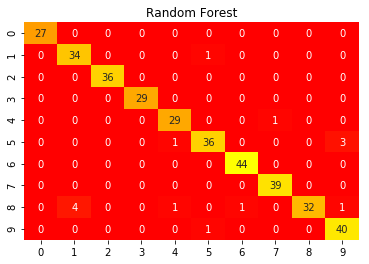

In [72]:
sns.heatmap(cm_log ,annot=True, cbar=False,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn ,annot=True, cbar=False,cmap = 'winter')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm ,annot=True, cbar=False,cmap = 'spring')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt ,annot=True, cbar=False,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()
sns.heatmap(cm_rf ,annot=True, cbar=False,cmap = 'autumn')
plt.title('Random Forest')
plt.show()

In [78]:
print('='*20+'Logistic Regression'+'='*20)
print(cr_log)
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)
print('='*20+'Suport Vector Machine'+'='*20)
print(cr_svm)
print('='*20+'Descion Tree'+'='*20)
print(cr_dt)
print('='*20+'Random Forest'+'='*20)
print(cr_rf)

====================Logistic Regression====================
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      0.86      0.86        35
          2       0.94      0.94      0.94        36
          3       0.93      0.90      0.91        29
          4       0.82      0.93      0.87        30
          5       0.92      0.90      0.91        40
          6       0.96      0.98      0.97        44
          7       0.97      0.95      0.96        39
          8       0.91      0.77      0.83        39
          9       0.84      0.93      0.88        41

avg / total       0.92      0.91      0.91       360

====================KNearest Neighbour====================
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.75      0.94      0.84        35
          2       1.00      1.00      1.00        36
          3       0.90      0

# Saving model 

In [79]:
from sklearn.externals import joblib

In [80]:
joblib.dump(model_log,'number_log.pkl')
joblib.dump(model_knn,'number_knn.pkl')
joblib.dump(model_svm,'number_svm.pkl')
joblib.dump(model_dt,'number_dt.pkl')
joblib.dump(model_rf,'number_rf.pkl')

['number_rf.pkl']

In [82]:
classify = joblib.load('number_rf.pkl') # Loading model

** Testing my model **

In [83]:
import cv2

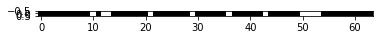

In [99]:
# step -1
img = cv2.imread('number2.jpg',0) # Load image and convert that into gray scale
# step -2 : Thresholding 
ret , thresh = cv2.threshold(img, 127,255,cv2.THRESH_BINARY_INV)
# step -3: Resize image
img_re = cv2.resize(thresh,(8,8)) # resizing into 8 x 8 image
# step - 4: Reshape image
test = img_re.reshape((1,64)) # this is new test data that need to pass to model
# step - 5: Normalization
test = test / test.max()
plt.imshow(test, cmap ='gray')
plt.show()

In [102]:
print('Logistic Regression:',model_log.predict(test))
print('KNearest Neighbour:',model_knn.predict(test))
print('Support Vector Machine:',model_svm.predict(test))
print('Desicion Tree:',model_dt.predict(test))
print('Random Forest',model_rf.predict(test))


Logistic Regression: [2]
KNearest Neighbour: [2]
Support Vector Machine: [2]
Desicion Tree: [2]
Random Forest [2]


In [ ]:
# Video

In [104]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    #th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255
        
        
        result=  model_rf.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
    cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()

In [ ]:
q to close 